In [29]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import tensorflow as tf

In [24]:
# Read in Data and view it: this dataframe will be updated to a new complete one made in SQL
Cause_df = pd.read_csv("Resources/causes-of-death-in-5-14-year-olds.csv")
Cause_df.head()

,Entity,Code,Year,Deaths - Self-harm - Sex: Both - Age: 5-14 years (Number),Deaths - Interpersonal violence - Sex: Both - Age: 5-14 years (Number),Deaths - Drowning - Sex: Both - Age: 5-14 years (Number),Deaths - Malaria - Sex: Both - Age: 5-14 years (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: 5-14 years (Number)",Deaths - Neoplasms - Sex: Both - Age: 5-14 years (Number),Deaths - Digestive diseases - Sex: Both - Age: 5-14 years (Number),...,Deaths - Nutritional deficiencies - Sex: Both - Age: 5-14 years (Number),Deaths - Diabetes mellitus - Sex: Both - Age: 5-14 years (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: 5-14 years (Number),Deaths - Exposure to forces of nature - Sex: Both - Age: 5-14 years (Number),Deaths - Environmental heat and cold exposure - Sex: Both - Age: 5-14 years (Number),Deaths - Diarrheal diseases - Sex: Both - Age: 5-14 years (Number),Deaths - Road injuries - Sex: Both - Age: 5-14 years (Number),Deaths - Tuberculosis - Sex: Both - Age: 5-14 years (Number),Deaths - HIV/AIDS - Sex: Both - Age: 5-14 years (Number),Deaths - Acute hepatitis - Sex: Both - Age: 5-14 years (Number)
0,Afghanistan,AFG,1990,12,65,290,3,27,278,119,...,103,11,99,0,2,27,511,160,0,103
1,Afghanistan,AFG,1991,12,80,311,6,30,299,129,...,111,12,108,277,2,30,552,170,0,112
2,Afghanistan,AFG,1992,14,88,356,8,34,341,147,...,128,14,124,120,1,34,633,191,0,129
3,Afghanistan,AFG,1993,15,97,393,3,38,373,162,...,142,15,138,42,1,60,695,205,1,143
4,Afghanistan,AFG,1994,15,105,410,7,39,385,170,...,150,16,145,29,1,42,721,209,1,150


<AxesSubplot:>

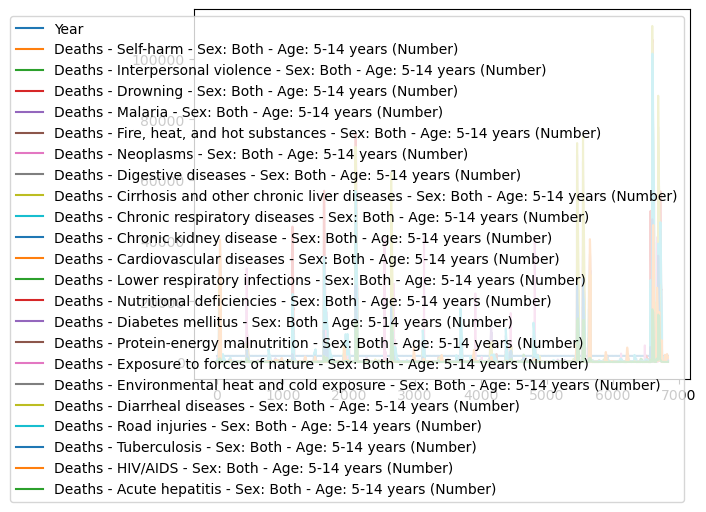

In [25]:
# Attempt to plot
Cause_df.plot()

In [26]:
# Encode Labels for SciKit Learn
le = LabelEncoder()
df2=Cause_df.copy()
df2["Entity"] = le.fit_transform(df2["Entity"])
df2["Code"] = le.fit_transform(df2["Code"])
# View Results (Bottom Half)
df2.tail()

,Entity,Code,Year,Deaths - Self-harm - Sex: Both - Age: 5-14 years (Number),Deaths - Interpersonal violence - Sex: Both - Age: 5-14 years (Number),Deaths - Drowning - Sex: Both - Age: 5-14 years (Number),Deaths - Malaria - Sex: Both - Age: 5-14 years (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: 5-14 years (Number)",Deaths - Neoplasms - Sex: Both - Age: 5-14 years (Number),Deaths - Digestive diseases - Sex: Both - Age: 5-14 years (Number),...,Deaths - Nutritional deficiencies - Sex: Both - Age: 5-14 years (Number),Deaths - Diabetes mellitus - Sex: Both - Age: 5-14 years (Number),Deaths - Protein-energy malnutrition - Sex: Both - Age: 5-14 years (Number),Deaths - Exposure to forces of nature - Sex: Both - Age: 5-14 years (Number),Deaths - Environmental heat and cold exposure - Sex: Both - Age: 5-14 years (Number),Deaths - Diarrheal diseases - Sex: Both - Age: 5-14 years (Number),Deaths - Road injuries - Sex: Both - Age: 5-14 years (Number),Deaths - Tuberculosis - Sex: Both - Age: 5-14 years (Number),Deaths - HIV/AIDS - Sex: Both - Age: 5-14 years (Number),Deaths - Acute hepatitis - Sex: Both - Age: 5-14 years (Number)
6835,227,204,2015,10,35,192,539,55,91,59,...,109,23,108,3,1,288,160,205,1746,6
6836,227,204,2016,10,38,209,441,60,99,64,...,116,25,115,7,1,298,174,213,1813,6
6837,227,204,2017,11,39,219,460,62,104,66,...,118,26,118,53,1,299,181,217,1829,7
6838,227,204,2018,11,39,223,468,63,106,66,...,119,26,119,0,1,287,185,217,1527,6
6839,227,204,2019,11,39,219,446,62,106,65,...,115,26,114,141,1,274,181,207,1322,6


In [28]:
# Begin Scaling Process
data_scaler = StandardScaler()
df2_scaled = data_scaler.fit_transform(df2)
df2_scaled[:5]

array([[-1.72447068, -1.75289789, -1.67524673, -0.23120561, -0.21363692,
        -0.18493574, -0.20123352, -0.22261529, -0.2129215 , -0.19359119,
        -0.18621855, -0.13834922, -0.18939026, -0.20940746, -0.15388034,
        -0.15472978, -0.20805996, -0.15171819, -0.09823511, -0.22456033,
        -0.2050871 , -0.19316099, -0.17019064, -0.17765302, -0.12833717],
       [-1.72447068, -1.75289789, -1.55971247, -0.23120561, -0.20294091,
        -0.1824414 , -0.20081813, -0.218722  , -0.20942308, -0.18944418,
        -0.18203557, -0.1292701 , -0.18598545, -0.20666287, -0.14715586,
        -0.15153734, -0.20448877, -0.14683284,  0.04220051, -0.22456033,
        -0.20476628, -0.1878352 , -0.16725825, -0.17765302, -0.12360312],
       [-1.72447068, -1.75289789, -1.44417822, -0.22946604, -0.19723638,
        -0.17709638, -0.2005412 , -0.21353094, -0.20242624, -0.18197957,
        -0.1736696 , -0.11111187, -0.17917582, -0.20025882, -0.13370691,
        -0.14475339, -0.19734639, -0.13814777, -0

In [30]:
# Verify Means and Standard Deviations of each Column
print(np.mean(df2_scaled[:,0]))
print(np.std(df2_scaled[:,0]))


-6.64835308313544e-17
1.0
